In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [40]:
df = pd.read_csv("Mall_Customers.csv")

In [41]:
lf = pd.read_csv("Live.csv")

In [42]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [43]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [44]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [45]:
df.rename(columns={
    "Annual Income (k$)": "annual score",
    "Spending Score (1-100)": "spending score"
}, inplace=True)



In [46]:
x = df.iloc[:,[3,4]]

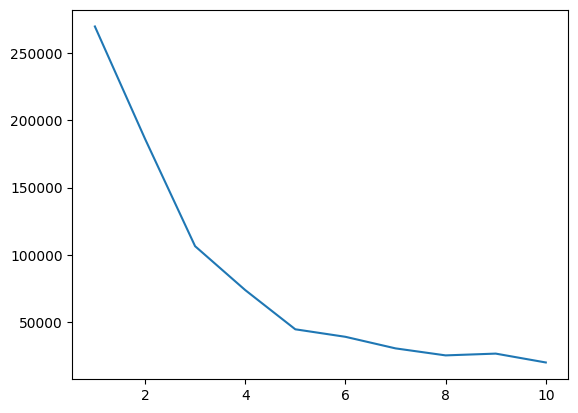

In [47]:
from sklearn.cluster import KMeans
wcss= []
for i in range(1,11):
    km =KMeans(n_clusters= i,init= "k-means++")
    km.fit(x)
    wcss.append(km.inertia_) 
plt.Figure(figsize=(3,2))
plt.plot(range(1,11),wcss)
plt.show()

In [48]:

kmean = KMeans(n_clusters=5,init= "k-means++",random_state=0)
y_pred = kmean.fit_predict(x)


In [49]:
y_pred

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

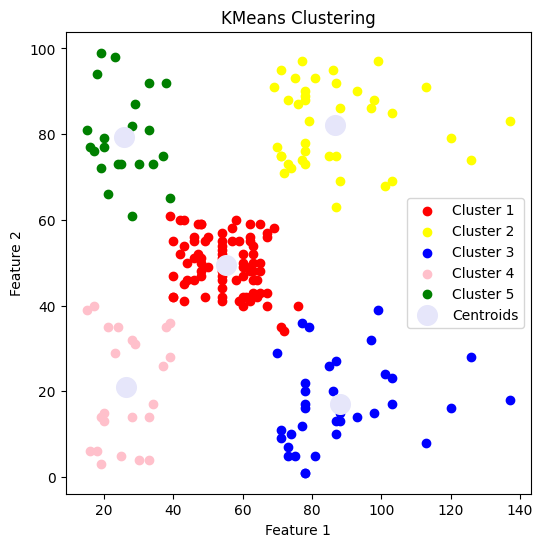

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

# Plotting the clusters
plt.scatter(x.loc[y_pred == 0, x.columns[0]], x.loc[y_pred == 0, x.columns[1]], label='Cluster 1', c='red')
plt.scatter(x.loc[y_pred == 1, x.columns[0]], x.loc[y_pred == 1, x.columns[1]], label='Cluster 2', c='yellow')
plt.scatter(x.loc[y_pred == 2, x.columns[0]], x.loc[y_pred == 2, x.columns[1]], label='Cluster 3', c='blue')
plt.scatter(x.loc[y_pred == 3, x.columns[0]], x.loc[y_pred == 3, x.columns[1]], label='Cluster 4', c='pink')
plt.scatter(x.loc[y_pred == 4, x.columns[0]], x.loc[y_pred == 4, x.columns[1]], label='Cluster 5', c='green')

# Plotting the centroids
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], c='lavender', s=200, label='Centroids')

plt.legend()
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [51]:
lf.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')

In [52]:
lf.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [53]:
lf['status_type'].value_counts()

status_type
photo     4288
video     2334
status     365
link        63
Name: count, dtype: int64

In [54]:
lf.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [55]:
x= lf.iloc[:,[3,4,5,6,7,8,9,10,11]]

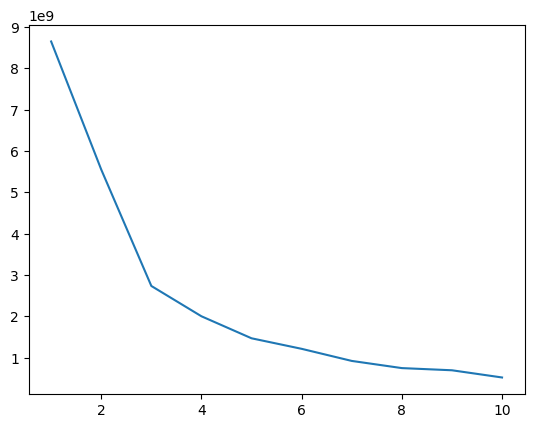

In [56]:
from sklearn.cluster import KMeans
wcss= []
for i in range(1,11):
    km =KMeans(n_clusters= i,init= "k-means++")
    km.fit(x)
    wcss.append(km.inertia_) 
plt.Figure(figsize=(3,2))
plt.plot(range(1,11),wcss)
plt.show()

In [57]:
kmean = KMeans(n_clusters=3,init= "k-means++",random_state=0)
y_pred = kmean.fit_predict(x)

In [58]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(7050,), dtype=int32)

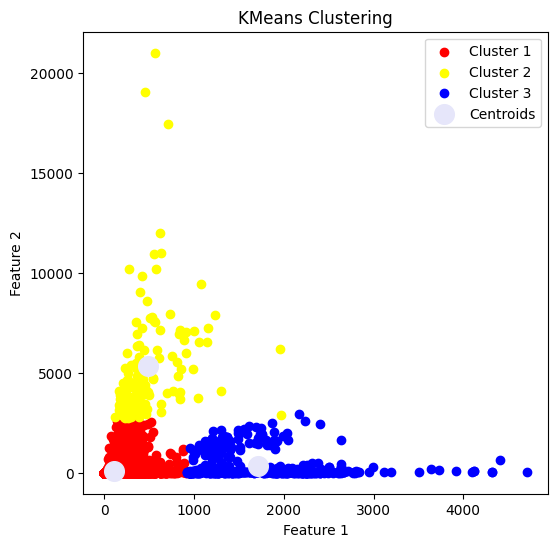

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))

# Plotting the clusters
plt.scatter(x.loc[y_pred == 0, x.columns[0]], x.loc[y_pred == 0, x.columns[1]], label='Cluster 1', c='red')
plt.scatter(x.loc[y_pred == 1, x.columns[0]], x.loc[y_pred == 1, x.columns[1]], label='Cluster 2', c='yellow')
plt.scatter(x.loc[y_pred == 2, x.columns[0]], x.loc[y_pred == 2, x.columns[1]], label='Cluster 3', c='blue')


# Plotting the centroids
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], c='lavender', s=200, label='Centroids')

plt.legend()
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
